VBFHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_vbfh_M-50_CTau-100mm.root 0
num of Gen Jets =  [27 20 22 ... 25 13 27]
HT 464.974001169
HT 465.743963957
HT 409.647969246
HT 495.207141399
HT 267.241814852
HT 251.980571747
HT 583.246183157
HT 518.62876153
HT 228.386194468
HT 335.906274796
QCD /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_QCD_HT300to500.root 1
num of Gen Jets =  [15 13 14 ... 35 11 14]
HT 402.892416954
HT 368.387997866
HT 401.735172272
HT 588.46747613
HT 490.96228838
HT 453.197827816
HT 409.436769962
HT 371.706574678
HT 325.940872669
HT 343.664638996
ZHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_zh_M-50_CTau-100mm.root 2
num of Gen Jets =  [28 26  6 ... 16 15 30]
HT 288.736807108
HT 290.187504768
HT 560.123533249
HT 316.205809832
HT 184.927770138
HT 292.284659147
HT 368.427690268
HT 289.841169834
HT 456.994022608
HT 251.511556149
ggHm50ct100mmWISR /home/maojiajing/cm

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190313/jet_ht.png has been created


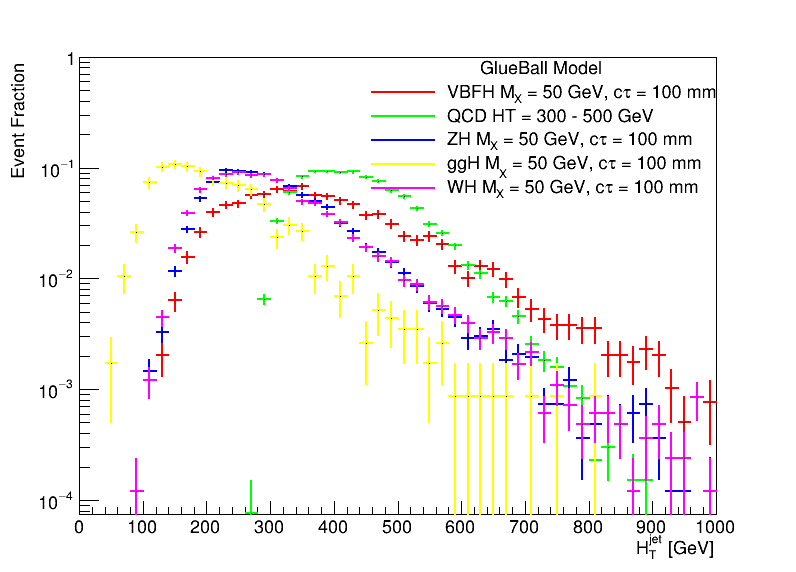

In [78]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import numpy.ma as ma
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable
import math


fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


headout_dir = '/home/maojiajing/cernbox/www/LLP/20190313' 
#fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
#fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
#fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
#fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
#fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root'
fpath['VBFHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_vbfh_M-50_CTau-100mm.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_wh_M-50_CTau-100mm.root'
fpath['ZHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_zh_M-50_CTau-100mm.root'
fpath['QCD'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_QCD_HT300to500.root'


label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct100mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
#label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct100mm'] = 'ZH M_{X} = 50 GeV, c#tau = 100 mm'
label['QCD'] = 'QCD HT = 300 - 500 GeV'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=1000

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    #for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
    print 'num of Gen Jets = ',tree[k]['nGenJets']
    nGenJets = tree[k]['nGenJets']
    for v in ['genJetE', 'genJetPt','genJetEta', 'genJetPhi']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['genJetPt'][:,4]

    #4-variables for jet
    jet_pt  = ten_gen_var['genJetPt']
    #print jet_pt
    jet_eta = ten_gen_var['genJetEta']
    jet_phi = ten_gen_var['genJetPhi']
    jet_e = ten_gen_var['genJetE']


    #GOTTA get some TLorentz Vectors for the jets
    genJet_p4_sum = rt.TLorentzVector()
    genJet_p4_temp = rt.TLorentzVector()
    
    HT = []

    #print(len(nGenJets))
    for i in range(len(nGenJets)):
        #print nGenJets[i]
        sum = 0.
        for j in range(nGenJets[i]):
            #print j
            #if(i==0):
                #print jet_pt[i][j]
            sum += math.fabs(jet_pt[i][j])  
        HT.append(sum)
            
        if(i<10):
            print 'HT',sum
    
        
    #for i in range(len(jet_pt)):
    '''
        tmp_p4_jet    = rt.TLorentzVector()
        tmp_p4_jet.SetPtEtaPhiE(jet_pt[i],jet_eta[i],jet_phi[i], jet_e[i])
        #print jet_pt[i],jet_eta[i],jet_phi[i], jet_e[i]
        jets_p4.append(tmp_p4_jet)
        
        genJet_p4_temp.append(genJet_p4_temp+tmp_p4_jet)
        
        tmp_pt_jet    = 0.
        tmp_pt_jet = jet_pt[i] 
        #print jet_pt[i],jet_eta[i],jet_phi[i], jet_e[i]
        jets_pt.append(tmp_pt_jet)
        
        genJet_pt_temp.append(genJet_pt_temp+tmp_pt_jet)

'''
        
     
    h['jet_ht'+str(k)] = create_TH1D(HT, axis_title=['H_{T}^{jet} [GeV]', 'Event Fraction'], name='', binning=[50,0,1000])
    h['jet_ht'+str(k)].SetLineColor(cnt+2)
    h['jet_ht'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['jet_ht'+str(k)].Scale(1/h['jet_ht'+str(k)].Integral())
    h['jet_ht'+str(k)].SetLineWidth(2)
    h['jet_ht'+str(k)].SetMaximum(1)
    h['jet_ht'+str(k)].Draw('same')

  
    legall.AddEntry(h['jet_ht'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/jet_ht.png')

    
  
    #cnt +=1
    #print cnt

VBFHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_vbfh_M-50_CTau-100mm.root 0
num of Gen Jets =  [27 20 22 ... 25 13 27]
QCD /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_QCD_HT300to500.root 1
num of Gen Jets =  [15 13 14 ... 35 11 14]
ZHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_zh_M-50_CTau-100mm.root 2
num of Gen Jets =  [28 26  6 ... 16 15 30]
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root 3
num of Gen Jets =  [22 10 13 ... 21 23 19]
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_wh_M-50_CTau-100mm.root 4
num of Gen Jets =  [14 10 19 ... 11  9  8]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190313/jet_ht.png has been created


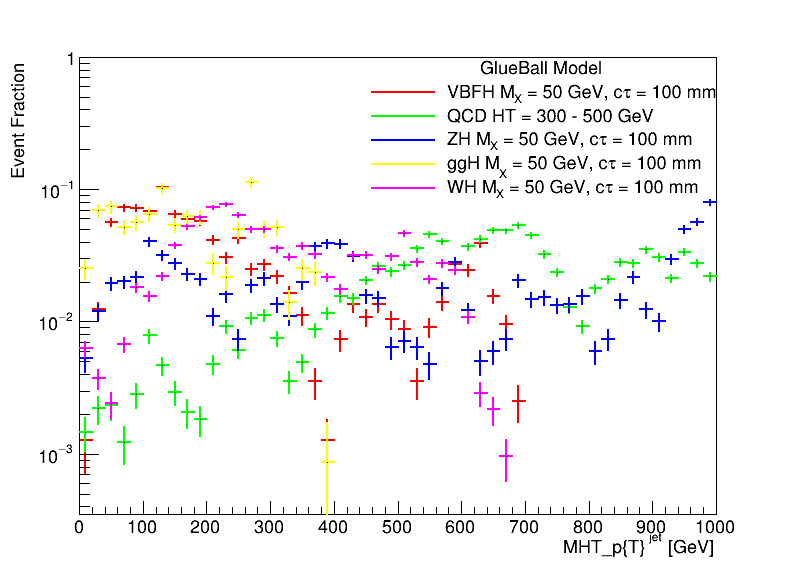

In [79]:
 

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    #for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
    print 'num of Gen Jets = ',tree[k]['nGenJets']
    nGenJets = tree[k]['nGenJets']
    for v in ['genJetE', 'genJetPt','genJetEta', 'genJetPhi']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['genJetPt'][:,4]

    #4-variables for jet
    jet_pt  = ten_gen_var['genJetPt']
    #print jet_pt
    jet_eta = ten_gen_var['genJetEta']
    jet_phi = ten_gen_var['genJetPhi']
    jet_e = ten_gen_var['genJetE']


    #GOTTA get some TLorentz Vectors for the jets
    genJet_p4_sum = rt.TLorentzVector()
    genJet_p4_temp = rt.TLorentzVector()
    
    HT = []
    MHT = []
    MHT_pt = []

    #print(len(nGenJets))
    for i in range(len(nGenJets)):
        #print nGenJets[i]
        sum = 0.
        for j in range(nGenJets[i]):
            #print j
            #if(i==0):
                #print jet_pt[i][j]
            sum += math.fabs(jet_pt[i][j]) 
            tmp_p4_jet    = rt.TLorentzVector()
            tmp_p4_jet.SetPtEtaPhiE(jet_pt[i][j],jet_eta[i][j],jet_phi[i][j], jet_e[i][j])
        #for j in range(nGenJets[i]):
            genJet_p4_temp += tmp_p4_jet
        HT.append(sum)
        MHT.append(genJet_p4_temp)
        MHT_pt.append(genJet_p4_temp.Pt())
        
        
        
            
        #if(i<10):
            #print 'HT',sum
    
    #jet_mht_pt = [x.Pt() for x in MHT]   

        
     
    h['jet_mht_pt'+str(k)] = create_TH1D(MHT_pt, axis_title=['MHT_p{T}^{jet} [GeV]', 'Event Fraction'], name='', binning=[50,0,1000])
    h['jet_mht_pt'+str(k)].SetLineColor(cnt+2)
    h['jet_mht_pt'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['jet_mht_pt'+str(k)].Scale(1/h['jet_mht_pt'+str(k)].Integral())
    h['jet_mht_pt'+str(k)].SetLineWidth(2)
    h['jet_mht_pt'+str(k)].SetMaximum(1)
    h['jet_mht_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['jet_mht_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/jet_ht.png')

    
  
    #cnt +=1
    #print cnt

In [80]:
 def find_1d_thr(hist,BinNum, thr, from_beginning):
#from_beginning = true, from the end, set it to be false
    int_from_0 = 0.
    int_from_end = 0.
    
    if(from_beginning):
        for j in range(BinNum):
            #print j
            #print hist.GetBinContent(j)
            #print hist.GetBinCenter(j)
            #print 'Integral of 1D histogram from bin 0 to j', hist.Integral(0,j)
            
            dr_from_0 = math.fabs( thr - int_from_0 )
            int_from_0 = hist.Integral(0,j)/hist.Integral()
            #print 'Fraction of integral of 1D histogram from bin 0 to j', int_from_0 
            dr_from_0_update = math.fabs( thr - int_from_0 )
 
            if (dr_from_0 < dr_from_0_update):
                cut = hist.GetBinCenter(j-1)
                return j-1, cut
                break
            else:
                dr_from_0 = dr_from_0_update
    else:
        for j in range(BinNum):
            #print BinNum-j
            #print hist.GetBinContent(BinNum-j)
            #print hist.GetBinCenter(BinNum-j)
            #print 'Integral of 1D histogram from bin BinNum-j to end', hist.Integral(BinNum-j,-1)
           
            dr_from_end = math.fabs( thr - int_from_end )
            int_from_end = hist.Integral(BinNum-j,BinNum)/hist.Integral()
            dr_from_end_update = math.fabs( thr - int_from_end )
            
            if (dr_from_end < dr_from_end_update):
                cut = hist.GetBinCenter(BinNum-j-1)

                
                return BinNum-j-1, cut
                break
            else:
                dr_from_end = dr_from_end_update
            

VBFHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_vbfh_M-50_CTau-100mm.root 0
value_cut_begin 18.0
value_cut_begin from hist  0.0355498721228
value_cut_end 106.0
QCD /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_QCD_HT300to500.root 1
value_cut_begin 42.0
value_cut_begin from hist  0.0125944584383
value_cut_end 174.0
ZHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_zh_M-50_CTau-100mm.root 2
value_cut_begin 14.0
value_cut_begin from hist  0.035752062619
value_cut_end 94.0
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root 3
value_cut_begin 14.0
value_cut_begin from hist  0.0495652173913
value_cut_end 54.0
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_wh_M-50_CTau-100mm.root 4
value_cut_begin 14.0
value_cut_begin from hist  0.0431211498973
value_cut_end 82.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190313/LLP_pt_cut.png has been created


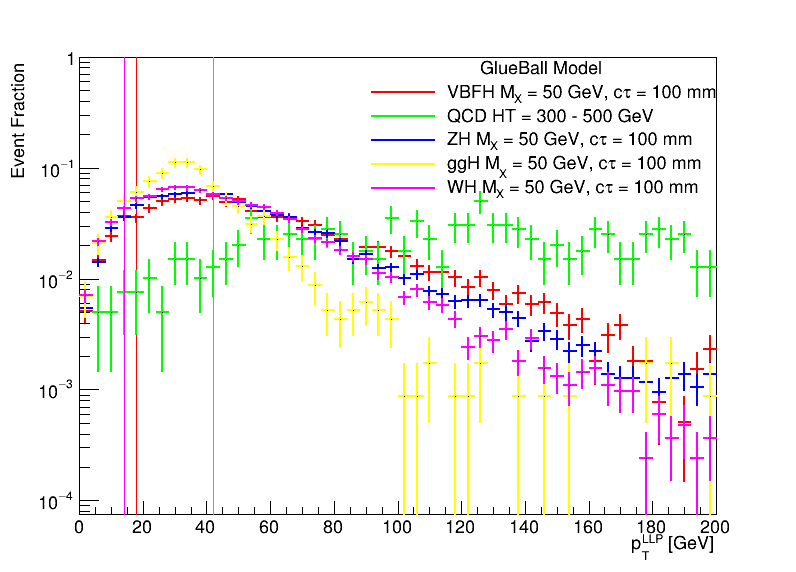

In [81]:


h = {}
line = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_pt'+str(k)] = create_TH1D(llp_pt, axis_title=['p_{T}^{LLP} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['llp_pt'+str(k)].SetLineColor(cnt+2)
    h['llp_pt'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['llp_pt'+str(k)].Scale(1/h['llp_pt'+str(k)].Integral())
    h['llp_pt'+str(k)].SetLineWidth(2)
    h['llp_pt'+str(k)].SetMaximum(1)
    h['llp_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_pt'+str(k)],str(label[k]),'l')
    
    #find threshold
    threshold = 0.1
    
    #print 'Integral of 1D histogram', h['llp_pt'+str(k)].Integral()
 
    
    #find_1d_thr(hist,BinNum, thr, from_beginning):
    bin_cut_begin, value_cut_begin = find_1d_thr(h['llp_pt'+str(k)],50, 0.1,1)
    #print 'bin_cut_begin',bin_cut_begin
    print 'value_cut_begin',value_cut_begin
    cut = value_cut_begin
    line[str(k)] = rt.TLine(cut,0,cut,1);
    line[str(k)].SetLineColor(cnt+2)
    line[str(k)].Draw('same');
    #h['llp_pt'+str(k)].Draw('same')
                                      
    print 'value_cut_begin from hist ',h['llp_pt'+str(k)].GetBinContent(bin_cut_begin)
    
    #h['llp_pt'+str(k)].Scale(1/h['llp_pt'+str(k)].Integral())
    #h['llp_pt'+str(k)].Draw('same')
    
    bin_cut_end, value_cut_end = find_1d_thr(h['llp_pt'+str(k)],50, 0.1,0)
    #print 'bin_cut_end',bin_cut_end
    print 'value_cut_end',value_cut_end
    #print 'value_cut_end from hist ',h['llp_pt'+str(k)].GetBinCenter(bin_cut_end)
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_pt_cut.png')



 
 

VBFHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_vbfh_M-50_CTau-100mm.root 0
num of Gen Jets =  [27 20 22 ... 25 13 27]
value_cut_begin 50.0
value_cut_begin from hist  0.0563131313131
value_cut_end 570.0
QCD /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_QCD_HT300to500.root 1
num of Gen Jets =  [15 13 14 ... 35 11 14]
value_cut_begin 370.0
value_cut_begin from hist  0.00870738287957
value_cut_end 890.0
ZHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_zh_M-50_CTau-100mm.root 2
num of Gen Jets =  [28 26  6 ... 16 15 30]
value_cut_begin 110.0
value_cut_begin from hist  0.0405534351145
value_cut_end 950.0
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root 3
num of Gen Jets =  [22 10 13 ... 21 23 19]
value_cut_begin 30.0
value_cut_begin from hist  0.0695047784535
value_cut_end 270.0
WHm50ct100mm /home/maojiajing/cms

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190313/jet_ht_cut.png has been created


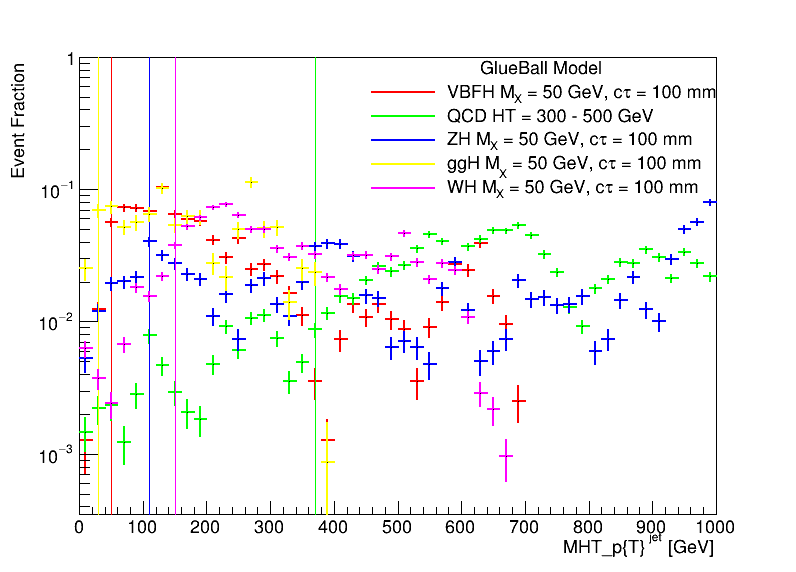

In [82]:
 

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    #for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
    print 'num of Gen Jets = ',tree[k]['nGenJets']
    nGenJets = tree[k]['nGenJets']
    for v in ['genJetE', 'genJetPt','genJetEta', 'genJetPhi']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['genJetPt'][:,4]

    #4-variables for jet
    jet_pt  = ten_gen_var['genJetPt']
    #print jet_pt
    jet_eta = ten_gen_var['genJetEta']
    jet_phi = ten_gen_var['genJetPhi']
    jet_e = ten_gen_var['genJetE']


    #GOTTA get some TLorentz Vectors for the jets
    genJet_p4_sum = rt.TLorentzVector()
    genJet_p4_temp = rt.TLorentzVector()
    
    HT = []
    MHT = []
    MHT_pt = []

    #print(len(nGenJets))
    for i in range(len(nGenJets)):
        #print nGenJets[i]
        sum = 0.
        for j in range(nGenJets[i]):
            #print j
            #if(i==0):
                #print jet_pt[i][j]
            sum += math.fabs(jet_pt[i][j]) 
            tmp_p4_jet    = rt.TLorentzVector()
            tmp_p4_jet.SetPtEtaPhiE(jet_pt[i][j],jet_eta[i][j],jet_phi[i][j], jet_e[i][j])
        #for j in range(nGenJets[i]):
            genJet_p4_temp += tmp_p4_jet
        HT.append(sum)
        MHT.append(genJet_p4_temp)
        MHT_pt.append(genJet_p4_temp.Pt())
        
        
        
            
        #if(i<10):
            #print 'HT',sum
    
    #jet_mht_pt = [x.Pt() for x in MHT]   

        
     
    h['jet_mht_pt'+str(k)] = create_TH1D(MHT_pt, axis_title=['MHT_p{T}^{jet} [GeV]', 'Event Fraction'], name='', binning=[50,0,1000])
    h['jet_mht_pt'+str(k)].SetLineColor(cnt+2)
    h['jet_mht_pt'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['jet_mht_pt'+str(k)].Scale(1/h['jet_mht_pt'+str(k)].Integral())
    h['jet_mht_pt'+str(k)].SetLineWidth(2)
    h['jet_mht_pt'+str(k)].SetMaximum(1)
    h['jet_mht_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['jet_mht_pt'+str(k)],str(label[k]),'l')
    
    #find threshold
    threshold = 0.1
    
    #print 'Integral of 1D histogram', h['llp_pt'+str(k)].Integral()
 
    
    #find_1d_thr(hist,BinNum, thr, from_beginning):
    bin_cut_begin, value_cut_begin = find_1d_thr(h['jet_mht_pt'+str(k)],50, 0.1,1)
    #print 'bin_cut_begin',bin_cut_begin
    print 'value_cut_begin',value_cut_begin
    cut = value_cut_begin
    line[str(k)] = rt.TLine(cut,0,cut,1);
    line[str(k)].SetLineColor(cnt+2)
    line[str(k)].Draw('same');
    #h['llp_pt'+str(k)].Draw('same')
                                      
    print 'value_cut_begin from hist ',h['jet_mht_pt'+str(k)].GetBinContent(bin_cut_begin)
    
    #h['llp_pt'+str(k)].Scale(1/h['llp_pt'+str(k)].Integral())
    #h['llp_pt'+str(k)].Draw('same')
    
    bin_cut_end, value_cut_end = find_1d_thr(h['jet_mht_pt'+str(k)],50, 0.1,0)
    #print 'bin_cut_end',bin_cut_end
    print 'value_cut_end',value_cut_end
    #print 'value_cut_end from hist ',h['llp_pt'+str(k)].GetBinCenter(bin_cut_end)
        
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/jet_ht_cut.png')

    
  
    #cnt +=1
    #print cnt

VBFHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_vbfh_M-50_CTau-100mm.root 0
num of Gen Jets =  [27 20 22 ... 25 13 27]
value_cut_begin 210.0
value_cut_begin from hist  0.0397770458576
value_cut_end 550.0
QCD /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_QCD_HT300to500.root 1
num of Gen Jets =  [15 13 14 ... 35 11 14]
value_cut_begin 330.0
value_cut_begin from hist  0.0603970900273
value_cut_end 530.0
ZHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_zh_M-50_CTau-100mm.root 2
num of Gen Jets =  [28 26  6 ... 16 15 30]
value_cut_begin 190.0
value_cut_begin from hist  0.0527528498666
value_cut_end 410.0
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root 3
num of Gen Jets =  [22 10 13 ... 21 23 19]
value_cut_begin 110.0
value_cut_begin from hist  0.0738488271069
value_cut_end 310.0
WHm50ct100mm /home/maojiajing/cm

Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190313/jet_ht_cut.png has been created


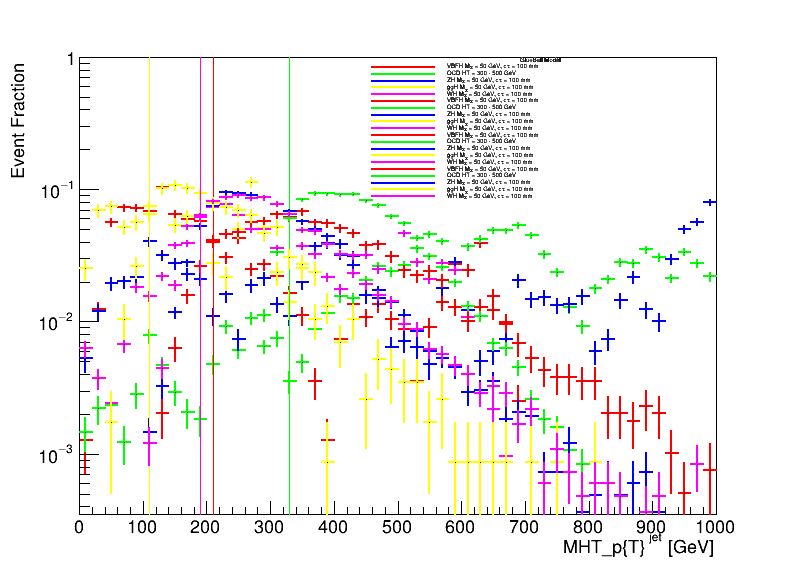

In [85]:
fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root'
fpath['VBFHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_vbfh_M-50_CTau-100mm.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_wh_M-50_CTau-100mm.root'
fpath['ZHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_zh_M-50_CTau-100mm.root'
fpath['QCD'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_QCD_HT300to500.root'


label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct100mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
#label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct100mm'] = 'ZH M_{X} = 50 GeV, c#tau = 100 mm'
label['QCD'] = 'QCD HT = 300 - 500 GeV'

cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    #for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
    print 'num of Gen Jets = ',tree[k]['nGenJets']
    nGenJets = tree[k]['nGenJets']
    for v in ['genJetE', 'genJetPt','genJetEta', 'genJetPhi']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['genJetPt'][:,4]

    #4-variables for jet
    jet_pt  = ten_gen_var['genJetPt']
    #print jet_pt
    jet_eta = ten_gen_var['genJetEta']
    jet_phi = ten_gen_var['genJetPhi']
    jet_e = ten_gen_var['genJetE']


    #GOTTA get some TLorentz Vectors for the jets
    genJet_p4_sum = rt.TLorentzVector()
    genJet_p4_temp = rt.TLorentzVector()
    
    HT[:] = []

    #print(len(nGenJets))
    for i in range(len(nGenJets)):
        #print nGenJets[i]
        sum = 0.
        for j in range(nGenJets[i]):
            #print j
            #if(i==0):
                #print jet_pt[i][j]
            sum += math.fabs(jet_pt[i][j])  
        HT.append(sum)
            
        #if(i<10):
        #    print 'HT',sum
    
        
  
        
     
    h['jet_ht'+str(k)] = create_TH1D(HT, axis_title=['H_{T}^{jet} [GeV]', 'Event Fraction'], name='', binning=[50,0,1000])
    h['jet_ht'+str(k)].SetLineColor(cnt+2)
    h['jet_ht'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['jet_ht'+str(k)].Scale(1/h['jet_ht'+str(k)].Integral())
    h['jet_ht'+str(k)].SetLineWidth(2)
    h['jet_ht'+str(k)].SetMaximum(1)
    h['jet_ht'+str(k)].Draw('same')

  
    legall.AddEntry(h['jet_ht'+str(k)],str(label[k]),'l')
    
   #find threshold
    threshold = 0.1
    
    #print 'Integral of 1D histogram', h['llp_pt'+str(k)].Integral()
 
    
    #find_1d_thr(hist,BinNum, thr, from_beginning):
    bin_cut_begin, value_cut_begin = find_1d_thr(h['jet_ht'+str(k)],50, 0.1,1)
    #print 'bin_cut_begin',bin_cut_begin
    print 'value_cut_begin',value_cut_begin
    cut = value_cut_begin
    line[str(k)] = rt.TLine(cut,0,cut,1);
    line[str(k)].SetLineColor(cnt+2)
    line[str(k)].Draw('same');
    #h['llp_pt'+str(k)].Draw('same')
                                      
    print 'value_cut_begin from hist ',h['jet_ht'+str(k)].GetBinContent(bin_cut_begin)
    
    #h['llp_pt'+str(k)].Scale(1/h['llp_pt'+str(k)].Integral())
    #h['llp_pt'+str(k)].Draw('same')
    
    bin_cut_end, value_cut_end = find_1d_thr(h['jet_ht'+str(k)],50, 0.1,0)
    #print 'bin_cut_end',bin_cut_end
    print 'value_cut_end',value_cut_end
    #print 'value_cut_end from hist ',h['llp_pt'+str(k)].GetBinCenter(bin_cut_end)
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/jet_ht_cut.png')

    
  
    #cnt +=1
    #print cnt